# Basics of Image Analysis

**In this program we will see which are the basic operations that we can do to modify an image to find anomalies in it or modify the image to focus on a point. For this project I will use a drawing sketch of a head viewed from different angles, since finding anomalies is usually used to detect diseases in the human body.**

First we have to import the libraries and the images. In this case we only need the library Computer Vision 2, knwon as CV2; we will upload the image 2 times, because we will make modifications for different porpuses; finally we will import a colab function to show the images

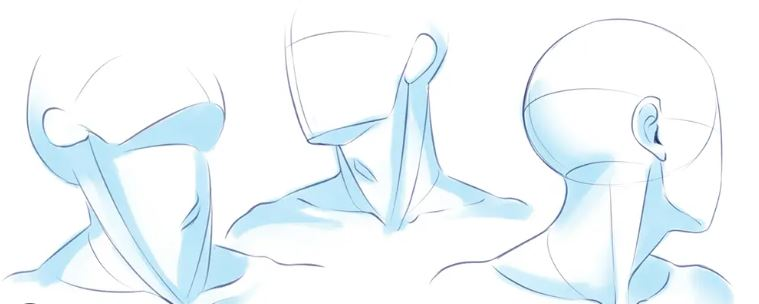

In [1]:
import cv2
img, img2 = cv2.imread("Sketch.jpg"), cv2.imread("Sketch.jpg")
from google.colab.patches import cv2_imshow
cv2_imshow(img)

We will print the shape of the image to know the dimensions of the two-dimensional array

In [2]:
print(img.shape)

(304, 759, 3)


## Darken Light Colors

The first modification we will do is to darken the light colors, so other light colors may stand out
To do this we have to know that the value of the pixel goes from 0 to 255 in each color (RGB), we said that the pixels closer to 0, are closer to black and the ones closer to 255, are closer to white. Accordingly, it would be sensible to increase the pixel values when we want to lighten a picture and to decrease the pixel values when we want to darken it; so we only have to traverse the entire image, find light colors and modify each RGB value of those pixels to 0.

*To find the light values, we just have to sum their RGB values and if they are greater than 700 it means that they are light colors. (700 is not an established value, it was defined with trial and error)*

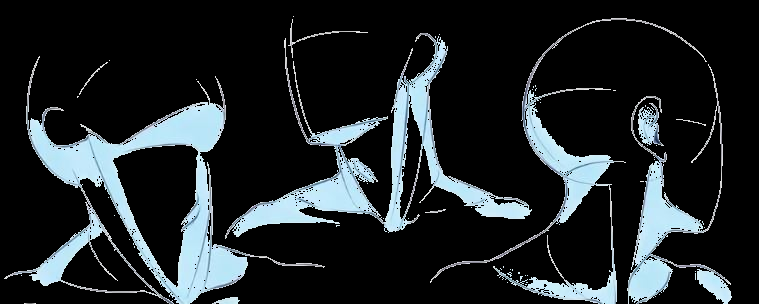

In [3]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        pixel = img[i,j]
        z=int(pixel[0])+int(pixel[1])+int(pixel[2])
        if(z>(700)):
          img[i,j]=[0,0,0]
cv2_imshow(img)

## Grayscale

To convert a pixel to its corresponding grayscale, we need to give the same value for each of its RGB values, but not just any value, we need to give the average of its 3 RGB values, so we need to sum the 3 values, divide it by 3 and then assign them. With this we eliminate all the strong colors and we are only left with black and white, thus leaving the image with better lighting and shadow.

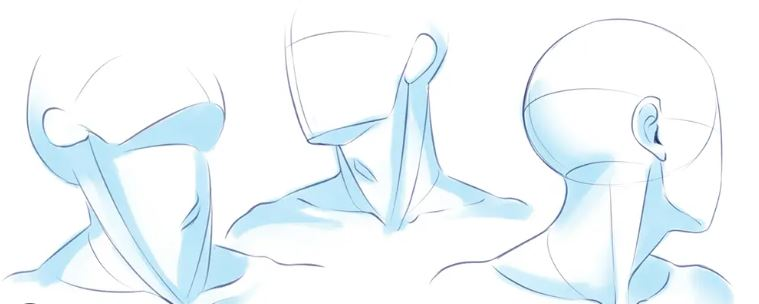

In [4]:
cv2_imshow(img2)
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
      pixel = img2[i,j]
      averageValue=(int(pixel[0])+int(pixel[1])+int(pixel[2]))/3
      img2[i, j] = (averageValue, averageValue, averageValue)

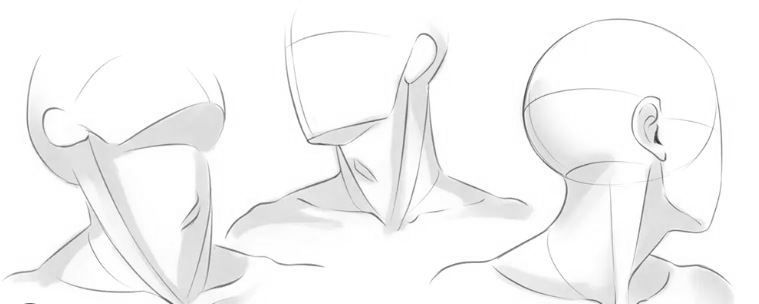

In [5]:
cv2_imshow(img2)

## Darken the light colors
Once again we'll darken the light colors, but now with the image in its grayscale, so we can appreciate the shadows in a better way in a lighter color and highlighting other areas, making us see that the same difference with different colors in an image can change it too much

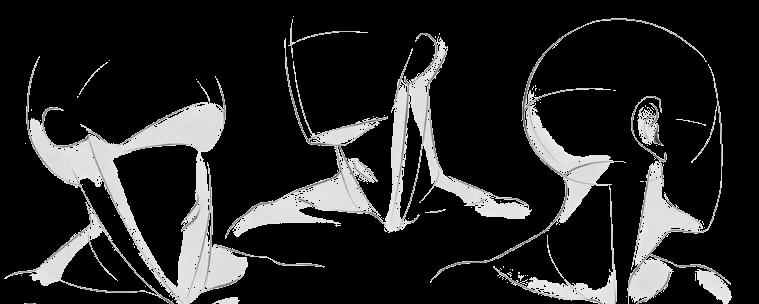

In [6]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        pixel = img2[i,j]
        z=int(pixel[0])+int(pixel[1])+int(pixel[2])
        if(z>(700)):
          img2[i,j]=[0,0,0]
cv2_imshow(img2)

## Tumor in the lungs
Now we'll see how we can apply this basics things to a real life case, detecting anomalies in x-ray radiographies; in this casea tumor in the lungs.

First we will upload the image, print it's shape and show it.

(379, 319, 3)


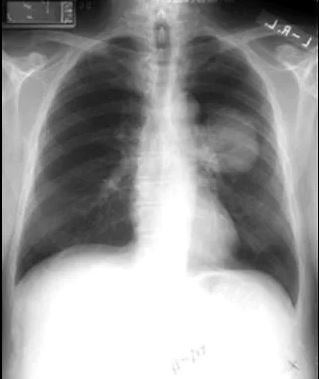

In [7]:
img3=cv2.imread("lungs.JPG")
print(img3.shape)
cv2_imshow(img3)

## Delete white colors
A tumor in the lungs will show up on an x-ray as a light object behind the ribs, so for this we are going to remove those colors that are too white so that the other light objects stand out a little better.

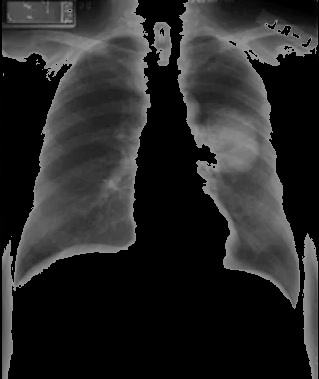

In [8]:
for i in range(img3.shape[0]):
    for j in range(img3.shape[1]):
        pixel = img3[i,j]
        z=int(pixel[0])+int(pixel[1])+int(pixel[2])
        if(z>(450)):
          img3[i,j]=[0,0,0]
cv2_imshow(img3)

## Detect Anomalies with Segmentation
Since we erased all the white colors, the only light colors correspond to the bones, organs, or some anomaly, so we can iluminate those areas to make them stand out, but we know too that tumors can appear from the middle part of the radiograph upwards, so we can segment the image into those areas and illuminate any anomaly to avoid possible confusions.


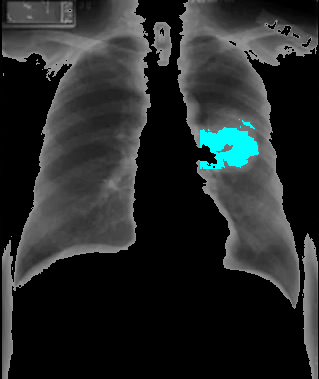

In [9]:
for i in range(110,img3.shape[0]-210):
    for j in range(200,img3.shape[1]-60):
        pixel = img3[i,j]
        z=int(pixel[0])+int(pixel[1])+int(pixel[2])
        if(z>(350)):
          img3[i,j]=[255,255,0]
cv2_imshow(img3)

## Tumor detected !
As we saw in the last image we detect a tumor, which is great because we can apply this theroy and combined with Machine Learning in real life and save many lifeeees.
Finally, it is also worth mentioning that if we do not know which areas to segment, we can illuminate all those light colors so that they stand out and let the artificial intelligence detect the anomalies by itself.

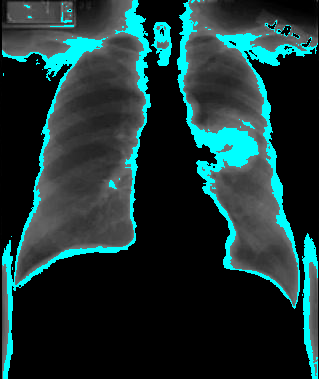

In [10]:
for i in range(img3.shape[0]):
    for j in range(img3.shape[1]):
        pixel = img3[i,j]
        z=int(pixel[0])+int(pixel[1])+int(pixel[2])
        if(z>(350)):
          img3[i,j]=[255,255,0]
cv2_imshow(img3)

## Conclusion
**As we could see, basic image processing is not very complex once we know the theory, so much so that in all the alterations that were made to the image, only a double nested cycle and a few mathematical operations had to be done, just we have to use the rgb values to our advantage. What follows is to use Machine Learning to obtain much more powerful programs.**